In [8]:
from ads_utils import load_data
import numpy as np

In [62]:
load_data(list(range(1, 24+1)))

,time,close,volume
0,2018-10-12 04:01:00,1776.69,677
1,2018-10-12 04:03:00,1778.00,379
2,2018-10-12 04:04:00,1768.00,1127
3,2018-10-12 04:05:00,1779.75,155
4,2018-10-12 04:07:00,1776.75,474
...,...,...,...
249302,2020-09-30 19:24:00,3163.00,744
249303,2020-09-30 19:39:00,3161.00,270
249304,2020-09-30 19:41:00,3161.00,162
249305,2020-09-30 19:44:00,3162.00,185


In [ ]:
# % Dataset - Peter 
#     % EDA - train-test split
#     % Max drawdown
#     % Volatility/standard dev of price changes

In [4]:
training_data = load_data([i for i in range(24, 13 - 1, -1)])['close'].to_list()
val_data = load_data([i for i in range(12, 7 - 1, -1)])['close'].to_list()
test_data = load_data([i for i in range(6, 1 - 1, -1)])['close'].to_list()

In [10]:
print(np.std(training_data))
print(np.std(val_data))
print(np.std(test_data))

133.66609950163974
118.38538796078998
394.3352173418392


In [13]:
def max_drawdown(prices):
    max_drawdown = 0
    start = -1
    end = -1
    for i in range(len(prices)):
        for j in range(i, len(prices)):
            if prices[i] - prices[j] > max_drawdown:
                max_drawdown = prices[i] - prices[j]
                start = i
                end = j
    return max_drawdown, start, end


In [14]:
max_drawdown(training_data)

(549.8900000000001, 1767, 27255)

In [15]:
max_drawdown(val_data)

(559.6036999999999, 43173, 52672)

In [16]:
max_drawdown(test_data)

(669.5700000000002, 52255, 58616)

In [46]:
load_data([i for i in range(6, 1 - 1, -1)]).iloc[58616]

time      2020-09-21 10:53:00
close                 2877.43
volume                  27498
Name: 58616, dtype: object

# Report graph

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from ads_utils import load_data
import datetime

SMALL, MED, LARGE = 22, 28, 34
LW = 2
plt.rc('xtick',labelsize=SMALL)
plt.rc('ytick',labelsize=SMALL)

data = load_data(list(range(1, 25)))
break1, break2 = len(load_data(list(range(1, 13)))), len(load_data(list(range(1, 19))))

In [41]:
def plot_dropdown(ax, sx, sy, ex, ey, label='maximum drawdown'):
    line, = ax.plot([sx, ex], [sy, ey], label=label, color='r')

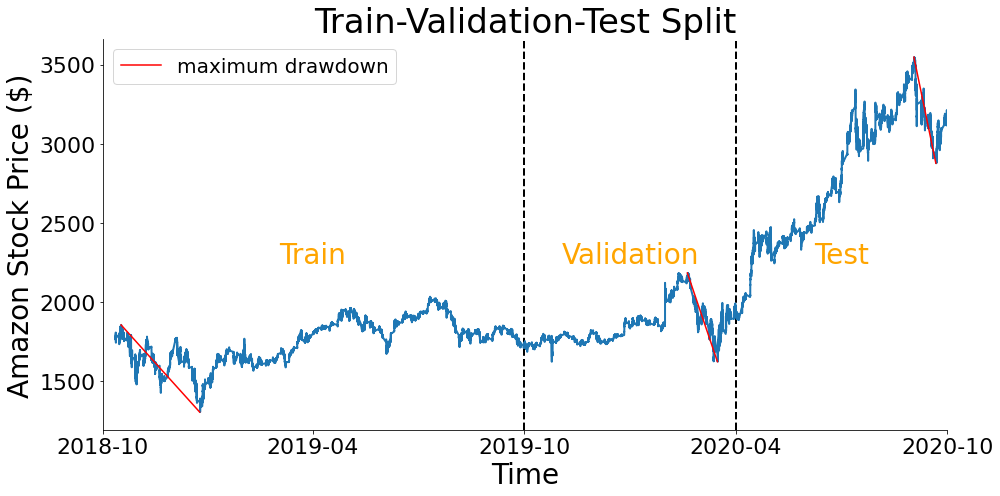

In [65]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(data.time, data.close, lw=LW)

ax.set_title('Train-Validation-Test Split', fontsize=LARGE)
ax.set_xlabel('Time', fontsize=MED)
ax.set_ylabel('Amazon Stock Price ($)', fontsize=MED)

# max dropdown
sx1 = datetime.datetime(2018, 10, 17)
ex1 = datetime.datetime(2018, 12, 24)
sy1 = 1857
ey1 = 1307.11

sx2 = datetime.datetime(2020, 2, 19)
ex2 = datetime.datetime(2020, 3, 16)
sy2 = 2184.92
ey2 = 1625.32


sx3 = datetime.datetime(2020, 9, 2)
ex3 = datetime.datetime(2020, 9, 21)
sy3 = 3547
ey3 = 2877.43


plot_dropdown(ax, sx1, sy1, ex1, ey1, label="maximum drawdown")
plot_dropdown(ax, sx2, sy2, ex2, ey2, label=None)
plot_dropdown(ax, sx3, sy3, ex3, ey3, label=None)
ax.legend(fontsize=20)


ax.set_xticks([datetime.datetime(y,m,1) for y in [2018, 2019, 2020] for m in [10, 4]])
ax.set_xlim(datetime.datetime(2018,10,1), datetime.datetime(2020,10,1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  
plt.axvline(datetime.datetime(2019,10,1), color='black', lw=LW, zorder=-1, linestyle='--')  
plt.axvline(datetime.datetime(2020, 4,1), color='black', lw=LW, zorder=-1, linestyle='--')

ax.annotate('Train', xy=(datetime.datetime(2019,4,1), 2300), xytext=(0, 0), textcoords='offset points', 
            ha='center', va='center', color='orange', fontsize=MED)
ax.annotate('Validation', xy=(datetime.datetime(2020,1,1), 2300), xytext=(0, 0), textcoords='offset points', 
            ha='center', va='center', color='orange', fontsize=MED)
ax.annotate('Test', xy=(datetime.datetime(2020,7,1), 2300), xytext=(0, 0), textcoords='offset points', 
            ha='center', va='center', color='orange', fontsize=MED)

plt.tight_layout()
sns.despine()
plt.savefig('TrainValTestSplit.png', dpi=2*fig.dpi)
plt.show()